# **KÜTÜPHANELERİ IMPORT ETME VE VERİ SETİNİ YÜKLEME**

# Kütüphaneleri Import Etme


In [53]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px      #diğer kütüphaneler ihtiyaç duydukça import edildi.

# Veri Setini Yükleme-Okuma

In [54]:
veriler = pd.read_csv("Auto Sales data.csv")

# Column Adları ve Açıklamaları

ORDERNUMBER:	Her bir ürüne ayrı ayrı verilen sipariş numarısıdır.

QUANTITYORDERED:	Her siparişte sipariş edilen ürün sayısıdır.

PRICEEACH:	Her bir ürünün birim fiyatıdır.

ORDERLINENUMBER:	Bir siparişteki her bir öğenin satır numarasıdır.

SALES:	Her bir siparişin toplam satış tutarıdır.(birim fiyatı * satış adedi)

ORDERDATE:	Siparişin verildiği tarihtir.

DAYS_SINCE_LASTORDER:	Her müşterinin son siparişinden bu yana geçen gün sayısıdır. (Müşteri satın alma modellerini analiz etmek için kullanılabilir.)

STATUS:	Siparişin durumunu gösterir, "Shipped," "In Process," "Cancelled," "Disputed," "On Hold,"  "Resolved" gibi.

PRODUCTLINE:	Her bir öğenin ait olduğu ürün grubu kategorileridir.

MSRP:	Her ürün için önerilen satış fiyatıdır.

PRODUCTCODE:	Her ürüne verilen benzersiz koddur.

CUSTOMERNAME:	Siparişi veren müşterinin adıdır.

PHONE:	Siparişi veren müşterinin telefon numarısıdır.

ADDRESSLINE1:	Siparişi veren müşterinin adresidir.

CITY:	Siparişi veren müşterinin yaşadığı şehirdir.

POSTALCODE:	Müşterinin adresiyle ilişkili posta kodudur .

COUNTRY:	 Siparişi veren müşterinin yaşadığı ülkedir.

CONTACTLASTNAME:	Müşteriyle ilişkili irtibat kişisinin soyadıdır.

CONTACTFIRSTNAME:	Müşteriyle ilişkili irtibat kişisinin adıdır.

DEALSIZE:	Siparişin boyutudur. "Small," "Medium,"  "Large" gibi.

# **VERİ TEMİZLEME - ÖNİŞLEME**

# Eksik Verilerin Silinip - Temizlenmesi

In [90]:
print("Eksik veri kontrolü:",veriler.isnull().sum())
# Eksik değerlere sahip satırları kaldırılıp veri setini kullanıma daha uygun hale getirildi.
veriler2 = veriler.dropna(axis=0)
veriler2.drop(columns=['ORDERNUMBER','ADDRESSLINE1', 'CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'POSTALCODE', 'PHONE', 'PRODUCTCODE','ORDERLINENUMBER'], inplace=True) 
#verinin gereksiz sütunlari silindi.

Eksik veri kontrolü: ORDERNUMBER                0
QUANTITYORDERED         1266
PRICEEACH               1266
ORDERLINENUMBER         1266
SALES                   1266
ORDERDATE               1266
DAYS_SINCE_LASTORDER    1266
STATUS                  1266
PRODUCTLINE             1266
MSRP                    1266
PRODUCTCODE             1266
CUSTOMERNAME            1266
PHONE                   1266
ADDRESSLINE1            1266
CITY                    1266
POSTALCODE              1266
COUNTRY                 1266
CONTACTLASTNAME         1266
CONTACTFIRSTNAME        1266
DEALSIZE                1266
dtype: int64


C:\Users\feyza\AppData\Local\Temp\ipykernel_5240\2565789942.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Veri Setinin Özelliklerini Kontrol Etme


In [92]:

print("Veri setinin ilk birkaç satırı:",veriler2.head())
print("Veri setinin boyutu:", veriler2.shape)
print("Veri setinin sütunları:",veriler2.columns)
print("Veri setinin içeriği:",veriler2.info())
print("Veri setindeki sütun typelerı:",veriler2.dtypes)
print("Veri setinin son 5 satırı:",veriler2.tail())
print("Eksik veri kontrolü:",veriler2.isnull().sum()) # tekrar kontrol islemi yapiliyor.


Veri setinin ilk birkaç satırı:    QUANTITYORDERED  PRICEEACH    SALES   ORDERDATE  DAYS_SINCE_LASTORDER  \
0             30.0      95.70  2871.00  24/02/2018                 828.0   
1             34.0      81.35  2765.90  07/05/2018                 757.0   
2             41.0      94.74  3884.34  01/07/2018                 703.0   
3             45.0      83.26  3746.70  25/08/2018                 649.0   
4             36.0      96.66  3479.76  28/10/2018                 586.0   

    STATUS  PRODUCTLINE  MSRP        CITY COUNTRY DEALSIZE  
0  Shipped  Motorcycles  95.0         NYC     USA    Small  
1  Shipped  Motorcycles  95.0       Reims  France    Small  
2  Shipped  Motorcycles  95.0       Paris  France   Medium  
3  Shipped  Motorcycles  95.0    Pasadena     USA   Medium  
4  Shipped  Motorcycles  95.0  Burlingame     USA   Medium  
Veri setinin boyutu: (1446, 11)
Veri setinin sütunları: Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'DAYS_SINCE_LASTORDER

In [57]:
print("===="*20)

print(veriler2.describe())

       QUANTITYORDERED    PRICEEACH         SALES  DAYS_SINCE_LASTORDER  \
count      1446.000000  1446.000000   1446.000000           1446.000000   
mean         35.165284   101.341867   3566.787331           1758.282849   
std           9.768727    41.660684   1837.542045            835.040258   
min           6.000000    28.290000    541.140000             79.000000   
25%          27.000000    69.907500   2226.875000           1044.000000   
50%          35.000000    96.315000   3194.395000           1772.000000   
75%          43.000000   126.547500   4505.547500           2456.250000   
max          85.000000   250.730000  14082.800000           3562.000000   

              MSRP  
count  1446.000000  
mean    101.025588  
std      39.833825  
min      33.000000  
25%      68.250000  
50%      99.000000  
75%     124.000000  
max     214.000000  


* veriler2.describe() => Veri setinin temel istatistiksel özetini sağlayarak veri dağılımı hakkında bilgi almamızı kolaylaştıran bir methottur.

- Count: Her sütundaki değerlerin sayısıdır. Eğer eksik değer varsa bu değerler sayılmaz.

- Mean: Her sütundaki sayısal değerlerin ortalamasıdır

- Std: Her sütundaki sayısal değerlerin standart sapmasıdır. Standart sapma ise verilerin dağılımının ne kadar değişken olduğunu gösterir.

- Min: Her sütundaki en küçük değerdir.

- 25th percentile: Her sütundaki değerlerin %25'ini oluşturan değerdir.

- 50th percentile: Her sütundaki değerlerin orta değeri (medyanı)'dir. Medyan, verilerin küçükten büyüğe sıralandığında ortadaki değerdir.

- 75th percentile: Her sütundaki değerlerin %75'ini oluşturan değerdir.

- Max: Her sütundaki en büyük değerdir.

# **KATEGORİK VERİLERİ İŞLEME VE GÖRSELLEŞTİRME**

# Kategorik Olarak Ayırma

In [94]:

def column_type_detection(dataframe):
    cat_threshold = 10  # Kategorik olarak kabul edilecek esik değer
    car_threshold = 20  # Kardinalite esigi
    categorical_columns = [col for col in dataframe.columns if dataframe[col].dtype == 'object']
    numerical_but_categorical = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and dataframe[col].dtype != 'object']
    categorical_but_cardinal = [col for col in dataframe.columns if dataframe[col].nunique() > car_threshold and dataframe[col].dtype == 'object']
    numerical_columns = [col for col in dataframe.columns if dataframe[col].dtype != 'object' and col not in numerical_but_categorical]
    return categorical_columns, numerical_columns, categorical_but_cardinal, numerical_but_categorical


# Sütunlari ayirma
categorical_cols, numerical_cols, categorical_but_card, numerical_but_cat = column_type_detection(veriler2)

print("\nKategorik Sütunlar:", categorical_cols, len(categorical_cols))
print("\nSayısal Sütunlar:", numerical_cols, len(numerical_cols))
print("\nKategorik Ancak Cardinalite Aşan Sütunlar:", categorical_but_card, len(categorical_but_card))
print("\nSayısal Ancak Kategorik Gibi Davranan Sütunlar:", numerical_but_cat, len(numerical_but_cat))


Kategorik Sütunlar: ['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'CITY', 'COUNTRY', 'DEALSIZE'] 6

Sayısal Sütunlar: ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'DAYS_SINCE_LASTORDER', 'MSRP'] 5

Kategorik Ancak Cardinalite Aşan Sütunlar: ['ORDERDATE', 'CITY'] 2

Sayısal Ancak Kategorik Gibi Davranan Sütunlar: [] 0


# Görselleştirme


* Pie Plot


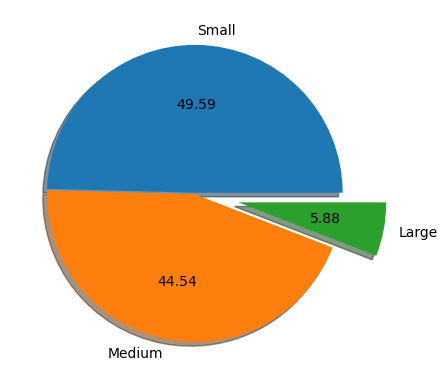

In [59]:
plt.pie(veriler2["DEALSIZE"].value_counts(),
        labels=veriler2["DEALSIZE"].unique(),
        autopct="%.2f",
        explode=[0.01,0,0.3],
        shadow=True)
plt.show()

* Pasta grafiği ürün boyutunun dağılımını görmemizi kolaylaştırıyor. Bu grafiği yorumlayacak olursak alınan ürün boyutunun büyük oranda small hemen ardından ise medium size olduğunu görüyoruz.

* Bar plot oluşturma

In [60]:

bar_fig = px.bar(veriler2, x='PRODUCTLINE', y='SALES', title='Sales By Product Line',color='PRODUCTLINE')
bar_fig.show()


* Bu sütun grafiği ürünlerin çeşidi ile satış miktarı arasındaki ilişkiyi bize gösterir. X-ekseni ürünleri göstermekte olup 7 farklı çeşittedir. Y-ekseni her bir ürünün ne kadar satıldığını gösterir.

   Bu grafikten en çok "classic cars" satışının yapıldığını anlayabiliriz.

* Histogram Plot

c:\Users\feyza\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



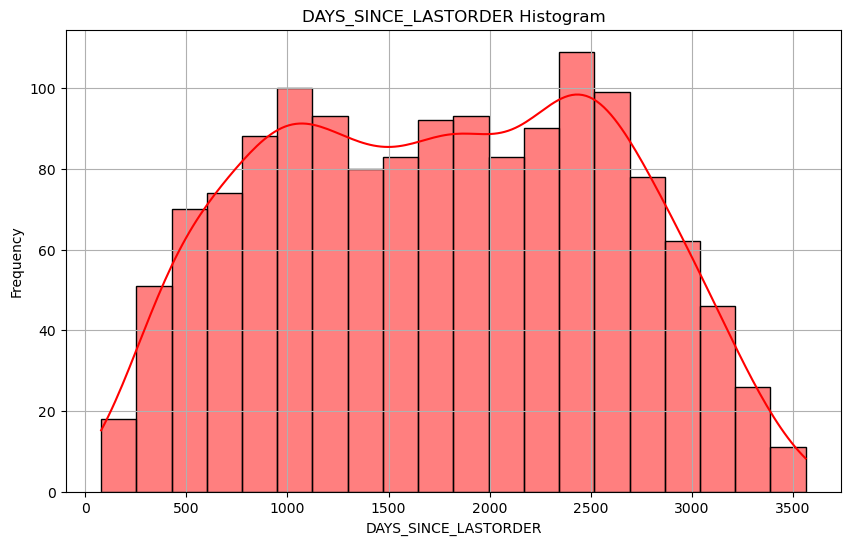

In [97]:
plt.figure(figsize=(10, 6))
sns.histplot(veriler2['DAYS_SINCE_LASTORDER'], bins=20, kde=True, color='red')
plt.title('DAYS_SINCE_LASTORDER Histogram')
plt.xlabel('DAYS_SINCE_LASTORDER')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Bu histogram grafiği müşterilerin verdiği son siparişi üzerinden ne kadar gün geçtiğini gösteriyor. Burada müşterilerin aldığı araç türü ve kalitesine göre son sipariş gününün artabileceğini farkediyoruz.

* Scatter Plot Oluşturma

In [62]:
bar_fig = px.scatter(veriler2, x='COUNTRY', y='PRICEEACH' ,title='Price Each By Country',color='COUNTRY')
bar_fig.show()     

* Bu dağılım grafiği her bir ürün adedinin satış fiyatının ülkelere göre değişimini gösterir. X-ekseni ülkeleri gösterirken Y-ekseni de ürünlerin adet fiyatını gösterir. 

     Bu grafik, bir ülkenin herhangi bir araca genel olarak verebileceği en yüksek fiyatı görmemizi, sonucunda ise ülke gelirleri arasındaki farkı anlamamızı sağlar.
   

# **Değişkenler Arası İlişkiler ve Analizi**

# Bu bölüm üç 3 farklı değişken analizi yapılarak verilerimiz arasındaki ilişki gösteriliyor.
1) "PRICEEACH" ve "SALES" arasındaki doğrusal ilişki
2) "STATUS" ve "SALES" için Chi-Square testi
3) Sütunlar arası korelasyon analizi

# LINEAR REGRESSION

Katsayılar: [35.85655128]
Kesme terimi: -55.09784815421199
Ortalama Kare Hatası (MSE): 1036866.2945145232
R^2 Skoru: 0.6544137742627633


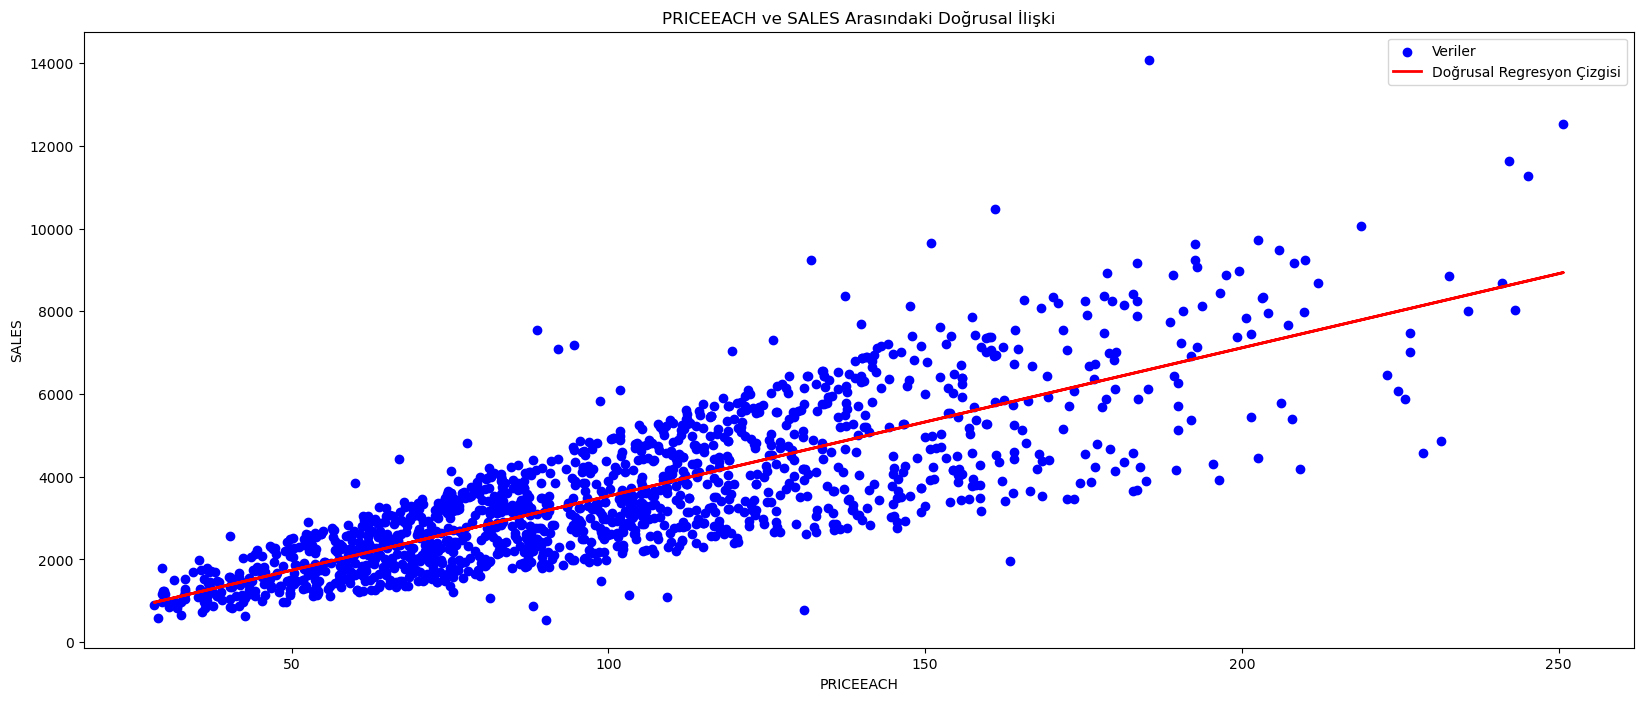

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = veriler2[['PRICEEACH']]  # Bağımsız değişken
y = veriler2['SALES']        # Bağımlı değişken


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # eğitim ve test verileri


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Katsayılar:", model.coef_)
print("Kesme terimi:", model.intercept_)
print("Ortalama Kare Hatası (MSE):", mean_squared_error(y_test, y_pred))
print("R^2 Skoru:", r2_score(y_test, y_pred))

bar_fig = px.scatter(veriler2, x='PRICEEACH' , y='SALES', color="PRICEEACH")
bar_fig.show()  

plt.figure(figsize=(20, 8))
plt.scatter(X, y, color='blue', label='Veriler')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Doğrusal Regresyon Çizgisi')
plt.xlabel('PRICEEACH')
plt.ylabel('SALES')
plt.title('PRICEEACH ve SALES Arasındaki Doğrusal İlişki')
plt.legend()
plt.show()

* Bu grafiklerde her bir araç fiyatının fiyatı yani ürün fiyatı ile  toplam satış fiyatını karşılştırıyoruz. X-ekseni sipariş edilen her bir ürünün tek tek fiyatını gösterirken Y-ekseni de toplam satış fiyatını gösterir.

     Burada satış ile ürün fiyatının artışı arasında doğrusal bir artış olduğunu gözlemleyebiliriz. Yani linear regression kullanarak da arasındaki doğrusal ilişkiyi açıkça görüyoruz. 2 grafik oluşturulmasının nedeni ise üst grafikte satış fiyatı ile toplam fiyatı her bir noktada detaylıca görmek çok kolay , diğer yandan alt grafikte ise asıl amaç doğrusal çizgiyi görmek.

#  CHI-SQUARE TESTİ

# 1. Çapraz Tablolar (Crosstabs)


Crosstab fonksiyonu, iki kategorik değişken arasındaki ilişkiyi göstermek için kullanılır ve özellikle Ki-Kare (Chi-square) testine hazırlık yapmak için faydalıdır

İki kategorik değişken arasındaki ilişkiyi değerlendirmek için kullanılan crosstab fonksiyonu, bir çapraz tablo oluşturur. Bu çapraz tablo, gözlenen frekansları içerir ve bu frekansların karşılaştırılması, değişkenler arasındaki ilişkiyi anlamamıza yardımcı olur.

In [64]:
# Çapraz tablo
crosstab = pd.crosstab(veriler2['STATUS'], veriler2['PRODUCTLINE'])
print(crosstab)


PRODUCTLINE  Classic Cars  Motorcycles  Planes  Ships  Trains  \
STATUS                                                          
Cancelled               2            0       3     16       1   
Disputed                3            0       0      0       0   
In Process              0            0       0      0       0   
On Hold                10            1       9      8       1   
Resolved                8            0       2      6       0   
Shipped               451          168     150     99      38   

PRODUCTLINE  Trucks and Buses  Vintage Cars  
STATUS                                       
Cancelled                   0             8  
Disputed                    0             0  
In Process                  0             9  
On Hold                     0             9  
Resolved                    5             8  
Shipped                   154           277  


 # 2. Chi-Square Testi

Ki-Kare (Chi-square) Testi:

Ki-Kare testi, iki kategorik değişken arasındaki ilişkinin belirlenmesi için kullanılır ve bu iki kategorik değişkenin bağımsız olup olmadığını test eder.

Ki-Kare testi, iki değişken arasında bağlantı olup olmadığını belirlemek için gözlenen ve beklenen frekanslar arasındaki farkı değerlendirir.

In [65]:
import scipy.stats as stats

# Chi-Square testi
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
print("Chi-Square Değeri:", chi2)
print("p-Değeri:", p)


Chi-Square Değeri: 154.04250082194662
p-Değeri: 1.2819955403721987e-18



Bu sonuçlar, yapılan Ki-Kare (Chi-square) testinin "anlamlı" olduğunu göstermektedir. 

Chi-square değeri, test edilen değişkenler arasındaki ilişkinin gücünü gösterirken, p-değeri ise bu ilişkinin istatistiksel olarak anlamlı olup olmadığını belirtir.

Chi-Square Değeri: 154.0425
Bu değer, test edilen kategorik değişkenler arasındaki ilişkinin gücünü temsil eder.

 Yüksek bir Chi-square değeri, değişkenler arasındaki ilişkinin güçlü olduğunu gösterir.

p-Değeri (p-value): 1.2819955403721987e-18
Bu değer, test edilen ilişkinin istatistiksel olarak anlamlı olup olmadığını belirtir.

p-değeri, genellikle belirlenen anlamlılık düzeyi (alpha) ile karşılaştırılır (genellikle alpha = 0.05 olarak alınır).
Bu p-değeri çok küçük olduğu için (1.28e-18), test edilen ilişkinin istatistiksel olarak anlamlı olduğu ve rastgele olmadığı sonucuna varabiliriz.

# 4. Görselleştirme
  
* Count Plot: Kategorik değişkenlerin dağılımını gösterir.

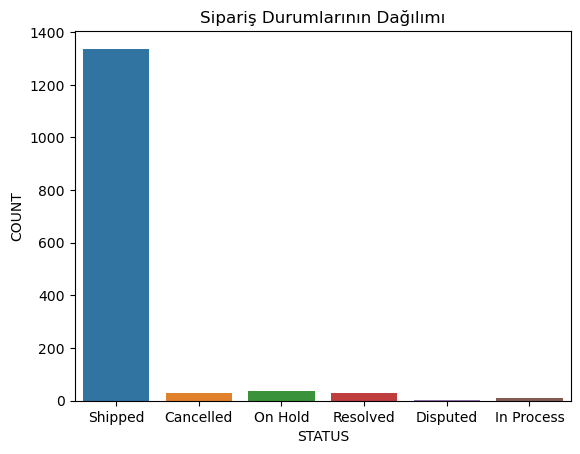

In [66]:
sns.countplot(x='STATUS', data=veriler2)
plt.title('Sipariş Durumlarının Dağılımı')
plt.xlabel('STATUS')
plt.ylabel('COUNT')
plt.show()


* Box Plot: Kategorik bir değişkenin farklı seviyelerinin bir sayısal değişken üzerindeki etkisini gösterir.

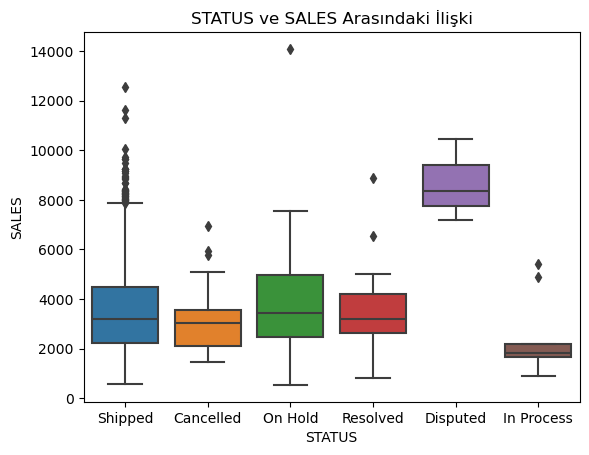

In [67]:
sns.boxplot(x='STATUS', y='SALES', data=veriler2)
plt.title('STATUS ve SALES Arasındaki İlişki')
plt.xlabel('STATUS')
plt.ylabel('SALES')
plt.show()


# KORELASYON ANALİZİ

In [86]:
veriler3 = veriler2[["QUANTITYORDERED", "PRICEEACH", "SALES", "DAYS_SINCE_LASTORDER", "MSRP"]]
# Korelasyon matrisi hesaplaniliyor
korelasyon_matrisi = veriler3.corr()
print(korelasyon_matrisi)


                      QUANTITYORDERED  PRICEEACH     SALES  \
QUANTITYORDERED              1.000000   0.007553  0.556869   
PRICEEACH                    0.007553   1.000000  0.805015   
SALES                        0.556869   0.805015  1.000000   
DAYS_SINCE_LASTORDER        -0.032665  -0.406808 -0.345093   
MSRP                         0.012575   0.779551  0.623675   

                      DAYS_SINCE_LASTORDER      MSRP  
QUANTITYORDERED                  -0.032665  0.012575  
PRICEEACH                        -0.406808  0.779551  
SALES                            -0.345093  0.623675  
DAYS_SINCE_LASTORDER              1.000000 -0.542182  
MSRP                             -0.542182  1.000000  


* +1: Pozitif yönde mükemmel doğrusal ilişki. Bir değişken artarken diğeri de artar.
* 0: Hiçbir doğrusal ilişki yok. Değişkenler arasında doğrusal bir bağlantı yok.
* -1: Negatif yönde mükemmel doğrusal ilişki. Bir değişken artarken diğeri azalır.

# **FEATURE ENGINEERING**


# 1) Özellik Seçimi

Model performansını artırmak için gereksiz veya yetersiz özellikleri kaldırabiliriz mesela kodun en baş kısımlarında eksik veri ve bazı verilerin temizlenmesi bölümü gereksiz sütun ve eksik bilgilerle dolu olan satırları silerek veriyi daha iyi analiz etmemizi sağlayarak işimizi kolaylaştırdı ve görüntü- bilgi kalabalıklığını önledi.


Eksik veriler olduğunda akla gelen ilk iki yöntem ; veri temizleme ve veriyi tahmin ederek yerini doldurma.
Bizim veri setimizde eksik verilerin silinmesi herhangi bir sorun oluşturmayıp aksine veri analizini kolaylaştırdığı için eksik veri tahmini yerine bu yöntem uygulandı.

# 2) Yeni Özellikler Oluşturma

Mevcut özelliklerden yola çıkarak yeni özellikler oluşturabiliriz. Örneğin, iki özellikten çıkarma, toplama, çarpma veya bölme işlemleri yaparak yeni bir özellik oluşturabiliriz.
Mesela bu veri setinde 'QUANTITYORDERED' ve 'PRICEEACH' sütunlarını çarparak 'TOTALPRICE' adında yeni bir özellik oluşturabilirdik ama bu zaten halihazırda bulunan bir "SALES" sütununu vereceği için bu işlemden kaçınıyoruz.

# 3) Polinom Özelliklerin Eklenmesi

 Sayısal özelliklerin kareleri veya çapraz terimleri gibi yüksek dereceli özellikler eklenerek, modelin daha karmaşık ilişkileri öğrenmesi sağlanabilir.

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Manuel olarak özellik adlarını oluşturulması(Burada, özellik adlarını oluştururken polinom özelliklerinin adlandırılması için bir dizi isim oluşturuluyor. Ancak PolynomialFeatures sınıfının get_feature_names_out yöntemi olmadığı için, özellik adlarını manuel olarak oluşturuldu.)
feature_names = ['1']
for i in range(1, X.shape[1] + 1):
    feature_names.append(f'X{i}')
for i in range(1, X.shape[1] + 1):
    for j in range(i, X.shape[1] + 1):
        feature_names.append(f'X{i}_X{j}')

print(feature_names)

['1', 'X1', 'X1_X1']


# 4) Yeni Özelliklerin Türetilmesi

 Mevcut özelliklerin bazı işlemlerden geçirilerek yeni özellikler elde edilebilir. Örneğin, aşağıda uygulanan iki özellik arasındaki oran gibi.

In [81]:
veriler2['PRICEEACH_to_QUANTITYORDERED'] = veriler2['PRICEEACH'] / veriler2['QUANTITYORDERED']


# 5) Zaman Serisi Özellikleri

 Tarih ve saat gibi zamanla ilişkili özelliklerden, mevsim, hafta içi/hafta sonu gibi yeni özellikler türetilebilir.
 Aşağıda sipariş tarihinden ay ve günün türetilmesi gibi.

In [83]:
veriler2['ORDERDATE'] = pd.to_datetime(veriler2['ORDERDATE'])
veriler2['month'] = veriler2['ORDERDATE'].dt.month
veriler2['weekday'] = veriler2['ORDERDATE'].dt.weekday


# 6) Doğal Dil İşleme (NLP)

 Metin verilerinden çıkarılan özelliklerle (kelime sayısı, kelime sıklığı, vb.) yeni özellikler elde edilebilir...